# Trabalho RN

Será  necessário uma avaliação individual de  cada  aluno para validar a disciplina. Conforme já informado devido à dificuldade para a realização de provas a avaliação da disciplina será baseada em um trabalho a  ser desenvolvido por cada aluno ou grupo de alunos (até 3 no máximo).

Vocês podem escolher o que  pretendem apresentar como trabalho. Sugestões: (a) um demonstrativo do aprendizado ou (b) a aplicação de alguma das técnicas vistas na disciplina,  mas vocês estão livres para  sugerir outros trabalhos, desde que envolvam técnicas vistas nesta disciplina.

(a)  um exemplo de demonstrativo pode ser uma visualização da evolução do aprendizado  de uma rede ao longo do treinamento. O demonstrativo deve ser um executável que rode de maneira autônoma (não pode ser no matlab ou no python)

(b)  a aplicação pode ser de uma ou mais técnicas vistas na disciplina sobre um banco de dados. Ao menos uma das técnicas empregadas  deve  ser de aprendizado supervisionado de RNs. O banco de dados é de sua escolha. Sugiro que seja de sua tese/dissertação, ou do  seu trabalho, ou então retirado do repositório da UCI http://archive.ics.uci.edu/ml/ Pré e pós processamento são desejáveis.

O conceito final na disciplina depende da correção, da complexidade e da completude do trabalho. Quanto maior o grupo mais resultados são esperados, claro.

A avaliação será realizada baseada em um relatório como  se fosse um artigo para congresso. Não há restrições quanto ao tamanho mínimo ou máximo do relatório, O tamanho  é livre, mas apenas como orientação algo entre 5 e 10 páginas A4 em espaço 1,5 me parece razoável. É importante que o relatório seja claro, completo e  conciso. Deve definir  os objetivos, a metodologia e apresentar os resultados obtidos. Comentários, críticas e conclusões são importantes.

Haverá também uma apresentação pelo(s) autor(es), como se fosse em um congresso. Eu   organizarei um calendário  para as apresentações, considerando as restrições de horário  de cada  um.

O relatório deve ser apresentado em arquivos  pdf e ser obrigatoriamente nomeados nome.sobrenome.pdf . Se necessário    podem ser apresentados arquivos complementares (p.ex., nome.sobrenome.dados.txt). Se você fez o texto do relatório em word me envie também o arquivo word (nome.sobrenome.doc). Exemplos:

josé.silva.trabalho.pdf,  
jose.silva.e.antonia.carneiro.trabalho.doc,  
jose.silva.apresentaçao.ppt,  
carlos.pereira.dados.txt.  

Em princípio espero que os relatórios sejam enviados por e-mail para mim até **segunda-feira dia 25/10**.   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense

## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information

**Age**: age of the patient [years]  
**Sex**: sex of the patient [**M**: Male, **F**: Female]  
**ChestPainType**: chest pain type [**TA**: Typical Angina, **ATA**: Atypical Angina, **NAP**: Non-Anginal Pain, **ASY**: Asymptomatic]  
**RestingBP**: resting blood pressure [mmHg]  
**Cholesterol**: serum cholesterol [mm/dl]  
**FastingBS**: fasting blood sugar [**1**: if FastingBS > 120 mg/dl, **0**: otherwise]  
**RestingECG**: resting electrocardiogram results [**Normal**: Normal, **ST**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), **LVH**: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]  
**ExerciseAngina**: exercise-induced angina [**Y**: Yes, **N**: No]  
**Oldpeak**: oldpeak = ST [Numeric value measured in depression]  
**ST_Slope**: the slope of the peak exercise ST segment [**Up**: upsloping, **Flat**: flat, **Down**: downsloping]  
**HeartDisease**: output class [1: heart disease, 0: Normal]  

## Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations  
Hungarian: 294 observations  
Switzerland: 123 observations  
Long Beach VA: 200 observations  
Stalog (Heart) Data Set: 270 observations  
Total: 1190 observations  
Duplicated: 272 observations  

```Final dataset: 918 observations```

In [2]:
df = pd.read_csv('heart.csv')
X = df[[
    'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 
    'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'
]]
y = df['HeartDisease']

print(f'Samples: {df.shape[0]}, Original features: {X.shape[1]}')
print(f'Heart Disease == 1: {df[df["HeartDisease"] == 1].shape[0]}, ' 
      f'Heart Disease == 0: {df[df["HeartDisease"] == 0].shape[0]}')

df.head()

Samples: 918, Original features: 11
Heart Disease == 1: 508, Heart Disease == 0: 410


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
X_onehot = pd.get_dummies(X, drop_first=True)
X_norm = (X_onehot - X_onehot.min()) / (X_onehot.max() - X_onehot.min())

print(f'Features (after one-hot encoding): {X_norm.shape[1]}')

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X_norm.values[train_index], X_norm.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

print(f'\nTrain data: {X_train.shape[0]} samples\t\tlabel counts: {np.unique(y_train, return_counts=True)[1]}')
print(f'Test data:  {X_test.shape[0]} samples\t\tlabel counts: {np.unique(y_test, return_counts=True)[1]}')

data = X_norm.copy()
data['HeartDisease'] = y

X_norm.head()

Features (after one-hot encoding): 15

Train data: 734 samples		label counts: [328 406]
Test data:  184 samples		label counts: [ 82 102]


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Valor para 95% de confiança na correlação: |r| > 0.066


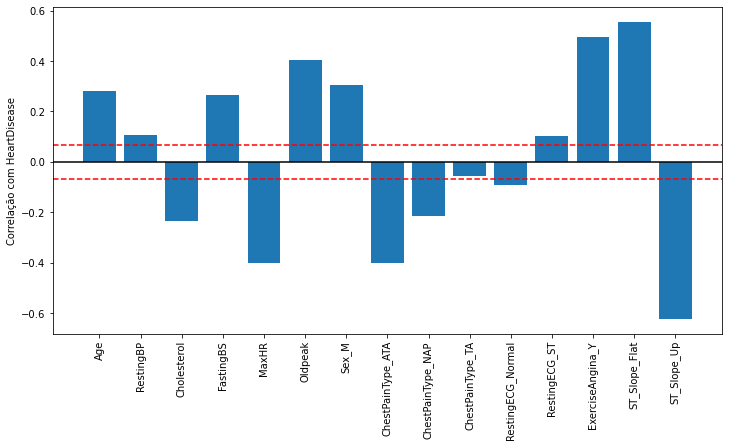

In [20]:
print('Valor para 95% de confiança na correlação: ', end='')
r95 = 2 / (np.sqrt(X_norm.shape[0]))
print(f'|r| > {r95:.3f}')

corr = data.corr().values[-1][:-1]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data.columns[:-1], corr)
ax.axhline(0.0, c='black')
ax.axhline(r95, c='red', linestyle='--')
ax.axhline(-r95, c='red', linestyle='--')
ax.set_ylabel('Correlação com HeartDisease')

plt.xticks(rotation=90)
plt.show()

# sns.heatmap(data.corr(), 
#             annot=True, 
#             cmap='YlGnBu', 
#             square=True, 
#             ax=ax, 
#             linewidths=.5,
#             cbar_kws={"fraction": 0.0452});

In [43]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(2, activation='softmax')
        
    def call(self, x):
        x = self.dense1(x)
        return self.dense2(x)

In [44]:
epochs = 150
batch_size = 32
learning_rate=0.01

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [45]:
results = {}

kf = KFold(n_splits=5)

for fold, (train_index, valid_index) in enumerate(kf.split(X_train)):
    X, X_valid = X_train[train_index], X_train[valid_index]
    y, y_valid = y_train[train_index], y_train[valid_index]
    
    print(f'>> Fold {fold+1}')
    tr_loss, tr_acc, t_loss, t_acc = [], [], [], []
    
    model = MLP()
    model.build(input_shape=(None, 15))
    
    @tf.function
    def train_step(X, y):
        with tf.GradientTape() as tape:
            y_hat = model(X)
            loss = loss_object(y, y_hat)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(y, y_hat)

    @tf.function
    def test_step(X, y):
        y_hat = model(X, training=False)
        t_loss = loss_object(y, y_hat)

        test_loss(t_loss)
        test_accuracy(y, y_hat)

    train_ds = tf.data.Dataset.from_tensor_slices((X, y)).batch(batch_size)
    test_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(batch_size)

    for epoch in range(epochs):        
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()

        for X_tr, y_tr in train_ds:
            train_step(X_tr, y_tr)

        for X_ts, y_ts in test_ds:
            test_step(X_ts, y_ts)
        
        tr_loss.append(train_loss.result().numpy())
        tr_acc.append(train_accuracy.result().numpy() * 100)
        
        t_loss.append(test_loss.result().numpy())
        t_acc.append(test_accuracy.result().numpy() * 100)
        
        if epoch % 50 == 49:
            print(f'Epoch {epoch + 1}, '
                  f'Loss: {train_loss.result():.3f}, '
                  f'Accuracy: {train_accuracy.result() * 100:.3f} %, '
                  f'Test Loss: {test_loss.result():.3f}, '
                  f'Test Accuracy: {test_accuracy.result() * 100:.3f} %')
                         
    results[f'fold{fold+1}'] = {
        'test_loss': t_loss, 'test_acc': t_acc, 'train_loss': tr_loss, 'train_acc': tr_acc
    }
    print()

>> Fold 1
Epoch 50, Loss: 0.319, Accuracy: 87.223 %, Test Loss: 0.418, Test Accuracy: 81.633 %
Epoch 100, Loss: 0.298, Accuracy: 87.734 %, Test Loss: 0.417, Test Accuracy: 82.313 %
Epoch 150, Loss: 0.289, Accuracy: 88.075 %, Test Loss: 0.420, Test Accuracy: 82.313 %

>> Fold 2
Epoch 50, Loss: 0.338, Accuracy: 86.201 %, Test Loss: 0.338, Test Accuracy: 88.435 %
Epoch 100, Loss: 0.322, Accuracy: 86.371 %, Test Loss: 0.347, Test Accuracy: 85.034 %
Epoch 150, Loss: 0.316, Accuracy: 86.542 %, Test Loss: 0.349, Test Accuracy: 85.034 %

>> Fold 3
Epoch 50, Loss: 0.329, Accuracy: 87.564 %, Test Loss: 0.363, Test Accuracy: 82.993 %
Epoch 100, Loss: 0.315, Accuracy: 87.564 %, Test Loss: 0.352, Test Accuracy: 84.354 %
Epoch 150, Loss: 0.309, Accuracy: 87.564 %, Test Loss: 0.346, Test Accuracy: 84.354 %

>> Fold 4
Epoch 50, Loss: 0.336, Accuracy: 86.542 %, Test Loss: 0.349, Test Accuracy: 87.075 %
Epoch 100, Loss: 0.320, Accuracy: 85.860 %, Test Loss: 0.337, Test Accuracy: 85.714 %
Epoch 150, Loss

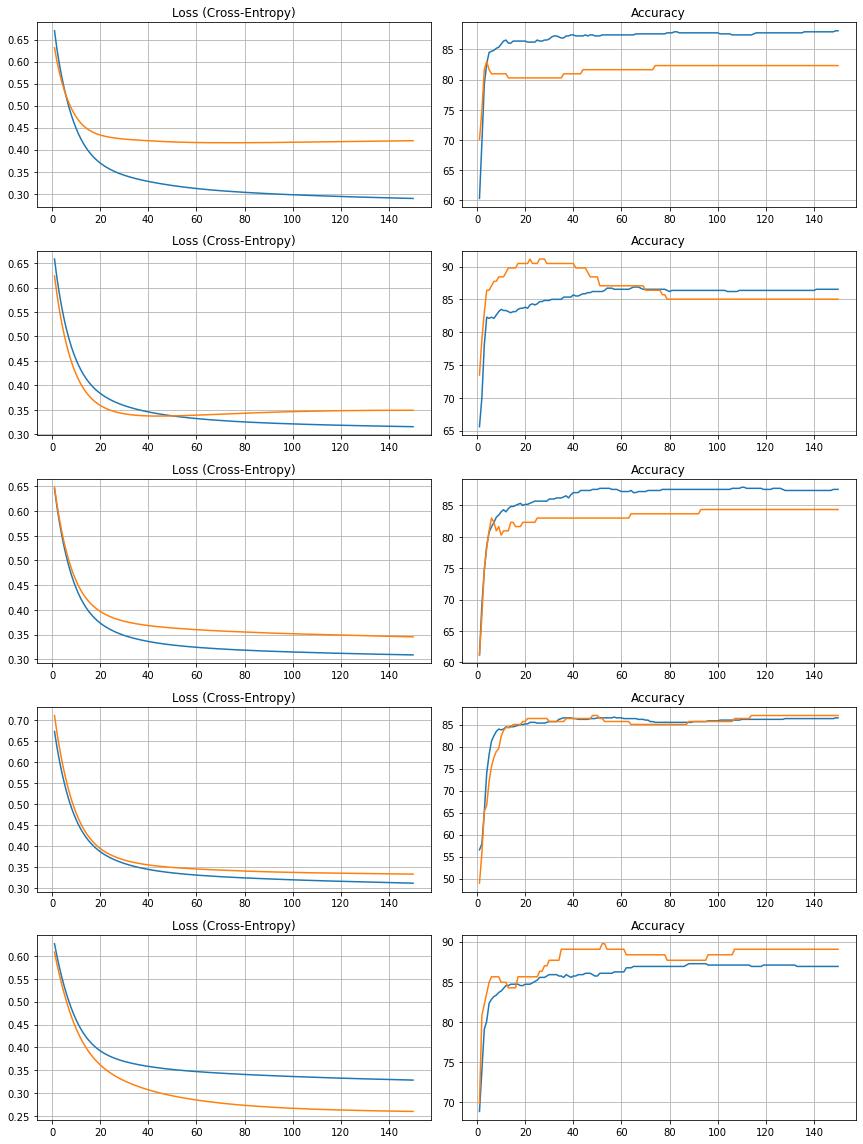

In [47]:
fig, ax = plt.subplots(5, 2, figsize=(12, 16))

for idx, fold in enumerate(results):
    t_loss, t_accuracy = results[fold]['test_loss'], results[fold]['test_acc']
    tr_loss, tr_accuracy = results[fold]['train_loss'], results[fold]['train_acc']
    ax[idx, 0].plot(np.arange(1, epochs+1), tr_loss)
    ax[idx, 0].plot(np.arange(1, epochs+1), t_loss)
    ax[idx, 0].grid()
    ax[idx, 0].set_title('Loss (Cross-Entropy)')
    
    ax[idx, 1].plot(np.arange(1, epochs+1), tr_accuracy)
    ax[idx, 1].plot(np.arange(1, epochs+1), t_accuracy)
    ax[idx, 1].grid()
    ax[idx, 1].set_title('Accuracy')

plt.tight_layout()

In [25]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [26]:
model = MLP()
model.build(input_shape=(None, 15))
    
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_hat = model(X)
        loss = loss_object(y, y_hat)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(y, y_hat)

@tf.function
def test_step(X, y):
    y_hat = model(X, training=False)
    t_loss = loss_object(y, y_hat)

    test_loss(t_loss)
    test_accuracy(y, y_hat)

for epoch in range(epochs):        
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for X_tr, y_tr in train_ds:
        train_step(X_tr, y_tr)

    for X_ts, y_ts in test_ds:
        test_step(X_ts, y_ts)

    if epoch % 50 == 49:
        print(f'Epoch {epoch + 1}, '
              f'Loss: {train_loss.result():.3f}, '
              f'Accuracy: {train_accuracy.result() * 100:.3f} %, '
              f'Test Loss: {test_loss.result():.3f}, '
              f'Test Accuracy: {test_accuracy.result() * 100:.3f} %')

Epoch 50, Loss: 0.334, Accuracy: 86.921 %, Test Loss: 0.361, Test Accuracy: 86.413 %
Epoch 100, Loss: 0.320, Accuracy: 87.057 %, Test Loss: 0.351, Test Accuracy: 84.783 %
Epoch 150, Loss: 0.314, Accuracy: 87.330 %, Test Loss: 0.350, Test Accuracy: 85.326 %


In [27]:
train_losses, test_losses = [], []

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)

for x, y in train_ds:
    y_hat = model(x)
    train_losses.append(loss_object(y, y_hat).numpy())
    
for x, y in test_ds:
    y_hat = model(x)
    test_losses.append(loss_object(y, y_hat).numpy())

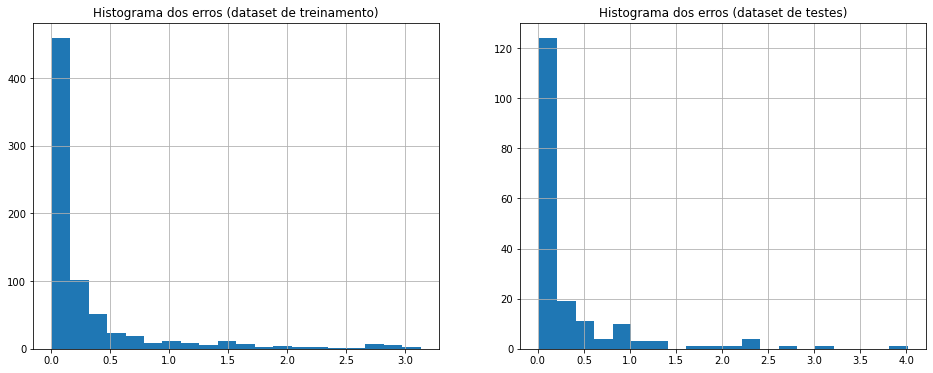

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].hist(train_losses, bins=20)
ax[0].set_title('Histograma dos erros (dataset de treinamento)')
ax[0].grid()

ax[1].hist(test_losses, bins=20)
ax[1].set_title('Histograma dos erros (dataset de testes)')
ax[1].grid()

plt.show()